# Notebook for milestone presentation(data analysis)

In [167]:
# !{pip install pandas-profiling}

In [168]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv("full_data.csv")

/Users/chenyifei/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (72,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [170]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

In [171]:
df.head(10)

,Unnamed: 0,Article File,Article Citation,AccessionID,LastUpdated (YYYY-MM-DD HH:MM:SS),PMID,License,Retracted,reading_time,flesch_reading_score,...,arxiv_id,ads_id,cited_by_rdts_count,handle,cited_by_pinners_count,cited_by_weibo_count,downloads,cited_by_linkedin_count,cited_by_book_reviews_count,urn
0,0,PMC001xxxxxx/PMC1043859.txt,PLoS Biol. 2005 Apr 22; 3(4):e60,PMC1043859,2021-01-05 08:21:20,15736975,CC BY,no,60.125,20.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,PMC001xxxxxx/PMC1043860.txt,PLoS Biol. 2005 Mar 15; 3(3):e85,PMC1043860,2021-01-05 08:21:20,15723116,CC BY,no,52.665,36.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,PMC001xxxxxx/PMC1043862.txt,PLoS Biol. 2005 Apr 22; 3(4):e122,PMC1043862,2021-01-05 08:21:20,15736988,CC BY,no,3.355,21.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,PMC001xxxxxx/PMC1044830.txt,PLoS Biol. 2005 Mar 22; 3(3):e63,PMC1044830,2021-01-05 08:21:20,15736976,CC BY,no,28.975,5.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,PMC001xxxxxx/PMC1044832.txt,PLoS Biol. 2005 Mar 22; 3(3):e71,PMC1044832,2021-01-05 08:28:12,15736978,CC BY,no,27.365,13.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,PMC001xxxxxx/PMC1044833.txt,PLoS Biol. 2005 Mar 22; 3(3):e77,PMC1044833,2021-01-05 08:21:20,15736979,CC BY,no,46.075,15.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,PMC001xxxxxx/PMC1044835.txt,PLoS Biol. 2005 Mar 22; 3(3):e79,PMC1044835,2021-01-05 08:28:12,15736981,CC BY,no,34.315,18.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,PMC001xxxxxx/PMC1044837.txt,PLoS Biol. 2005 Mar 22; 3(3):e103,PMC1044837,2021-01-05 08:28:12,15736983,CC BY,no,3.055,21.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,PMC001xxxxxx/PMC1044840.txt,PLoS Biol. 2005 Mar 22; 3(3):e109,PMC1044840,2021-01-05 08:28:12,15736986,CC BY,no,2.950,27.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,PMC001xxxxxx/PMC1054879.txt,PLoS Biol. 2005 Mar 1; 3(3):e67,PMC1054879,2021-01-05 08:21:20,15737020,CC BY,no,50.205,21.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df['date'] = pd.to_datetime(df['published_on'],unit='s')
df['year'] = df['date'].dt.year
df['average_cite_count'] = df['cited_by_accounts_count']/(2022-df['year'])
df['average_read_count'] = df['readers_count']/(2022-df['year'])

In [173]:
cited_avg = df.groupby('year').mean()[['cited_by_accounts_count']].reset_index().rename(columns={"cited_by_accounts_count":'cited_by_accounts_count_avg'})
df = pd.merge(df, cited_avg, on='year')
df['norm_cite'] = df['cited_by_accounts_count']/df['cited_by_accounts_count_avg']

In [174]:
df['norm_cite'].describe()

count    40276.000000
mean         1.000000
std         11.540578
min          0.031531
25%          0.132990
50%          0.265980
75%          0.531959
max       1481.001656
Name: norm_cite, dtype: float64

In [175]:
columns = [ 
    'reading_time', 
    'flesch_reading_score', 
    'dale_chall_readability_score',
    'total_paragraphs',
    'avg_sentences_per_para',
    'len_of_longest_paragraph',
    'total_sentences',
    'avg_words_per_sentence',
    'len_of_longest_sentence',
    'total_words',
    'compulsive_hedgers',
    'intensifiers',
    'and_frequency',
    'vague_words_count',
    'vague_words_frequency',
    'polysyllab_count',
    'polysyllab_frequency',
    'readers_count',
    'score',
    'cited_by_accounts_count',
    'average_read_count',
    'average_cite_count',
    'norm_cite']
df_clean = df[columns]
df_clean.head(10)



,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,avg_words_per_sentence,len_of_longest_sentence,total_words,...,vague_words_count,vague_words_frequency,polysyllab_count,polysyllab_frequency,readers_count,score,cited_by_accounts_count,average_read_count,average_cite_count,norm_cite
0,60.125,20.76,6.8,88,5.36,17,472,25.48,1010,12025,...,41,0.003410,2574,0.214054,318,4.500,6,18.705882,0.352941,0.189189
1,52.665,36.86,6.7,82,5.28,15,433,24.33,750,10533,...,41,0.003893,1766,0.167664,1499,23.104,24,88.176471,1.411765,0.756755
2,3.355,21.91,9.4,8,3.00,5,24,27.96,59,671,...,4,0.005961,137,0.204173,1,1.000,1,0.058824,0.058824,0.031531
3,28.975,5.84,8.4,39,4.54,17,177,32.74,683,5795,...,26,0.004487,1134,0.195686,229,3.000,5,13.470588,0.294118,0.157657
4,27.365,13.18,8.2,43,3.51,12,151,36.25,756,5473,...,24,0.004385,1126,0.205737,162,7.050,6,9.529412,0.352941,0.189189
5,46.075,15.58,7.5,78,4.17,12,325,28.35,801,9215,...,130,0.014107,2161,0.234509,132,3.000,6,7.764706,0.352941,0.189189
6,34.315,18.73,7.2,75,3.64,11,273,25.14,677,6863,...,159,0.023168,1324,0.192919,1771,48.734,22,104.176471,1.294118,0.693692
7,3.055,21.20,9.6,6,3.50,5,21,29.10,63,611,...,2,0.003273,112,0.183306,4,1.000,1,0.235294,0.058824,0.031531
8,2.950,27.29,8.9,4,5.00,8,20,29.50,66,590,...,10,0.016949,95,0.161017,16,0.750,2,0.941176,0.117647,0.063063
9,50.205,21.67,7.0,125,3.66,14,457,21.97,731,10041,...,16,0.001593,2199,0.219002,57,1.000,1,3.352941,0.058824,0.031531


In [176]:
df_clean.corr()

,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,avg_words_per_sentence,len_of_longest_sentence,total_words,...,vague_words_count,vague_words_frequency,polysyllab_count,polysyllab_frequency,readers_count,score,cited_by_accounts_count,average_read_count,average_cite_count,norm_cite
reading_time,1.000000,0.018692,-0.443976,0.617664,0.072494,0.311897,0.882632,0.067854,0.267560,1.000000,...,0.620680,-0.025926,0.970326,-0.022583,0.108563,0.004383,0.000424,0.116026,0.001132,0.005673
flesch_reading_score,0.018692,1.000000,-0.629517,0.006806,0.099795,0.175874,0.173279,-0.431970,-0.257063,0.018692,...,-0.062805,-0.101639,-0.043909,-0.298249,-0.006627,0.000872,0.000041,-0.008133,-0.000081,-0.000602
dale_chall_readability_score,-0.443976,-0.629517,1.000000,-0.327567,-0.091161,-0.284378,-0.593897,0.494502,0.173878,-0.443976,...,-0.220607,0.101778,-0.403759,0.168101,-0.046124,-0.000153,0.001172,-0.048562,0.001305,0.002453
total_paragraphs,0.617664,0.006806,-0.327567,1.000000,-0.104282,0.055096,0.691418,-0.211353,0.045456,0.617664,...,0.417150,0.017520,0.591526,-0.056326,0.075560,-0.000012,-0.003185,0.082512,-0.002435,0.000694
avg_sentences_per_para,0.072494,0.099795,-0.091161,-0.104282,1.000000,0.673906,0.168598,-0.123246,-0.046753,0.072494,...,0.035906,-0.008356,0.080871,0.004492,-0.013585,-0.002131,-0.000696,-0.016539,-0.001329,-0.000004
len_of_longest_paragraph,0.311897,0.175874,-0.284378,0.055096,0.673906,1.000000,0.524837,-0.334818,-0.227945,0.311897,...,0.163249,-0.039349,0.312435,0.010564,0.040971,0.004956,0.000766,0.049156,0.001600,0.006877
total_sentences,0.882632,0.173279,-0.593897,0.691418,0.168598,0.524837,1.000000,-0.327025,0.009727,0.882632,...,0.522862,-0.053460,0.854160,-0.036615,0.097952,0.002627,-0.000465,0.107391,0.000342,0.004186
avg_words_per_sentence,0.067854,-0.431970,0.494502,-0.211353,-0.123246,-0.334818,-0.327025,1.000000,0.523397,0.067854,...,0.091542,0.071411,0.075162,0.053132,0.003816,0.001302,0.000465,0.000126,-0.000135,-0.000618
len_of_longest_sentence,0.267560,-0.257063,0.173878,0.045456,-0.046753,-0.227945,0.009727,0.523397,1.000000,0.267560,...,0.114435,-0.079348,0.263685,0.010442,0.007210,-0.005041,-0.001122,0.002815,-0.002274,-0.007547
total_words,1.000000,0.018692,-0.443976,0.617664,0.072494,0.311897,0.882632,0.067854,0.267560,1.000000,...,0.620680,-0.025926,0.970326,-0.022583,0.108563,0.004383,0.000424,0.116026,0.001132,0.005673


In [177]:
df_clean.corr(method='spearman')

,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,avg_words_per_sentence,len_of_longest_sentence,total_words,...,vague_words_count,vague_words_frequency,polysyllab_count,polysyllab_frequency,readers_count,score,cited_by_accounts_count,average_read_count,average_cite_count,norm_cite
reading_time,1.000000,0.070440,-0.552070,0.723937,0.217282,0.435364,0.904153,0.012055,0.162754,1.000000,...,0.657997,-0.026451,0.965643,-0.017675,0.404314,0.084606,0.071616,0.404741,0.083675,0.066529
flesch_reading_score,0.070440,1.000000,-0.661467,0.102598,0.285631,0.402100,0.304743,-0.607186,-0.405466,0.070440,...,-0.068450,-0.159565,-0.043560,-0.473221,-0.016006,0.012891,-0.004281,-0.012441,0.000874,0.001322
dale_chall_readability_score,-0.552070,-0.661467,1.000000,-0.469386,-0.358237,-0.585555,-0.742021,0.540038,0.309414,-0.552070,...,-0.304150,0.119525,-0.498793,0.172126,-0.211141,-0.031650,-0.005084,-0.213139,-0.014251,-0.013922
total_paragraphs,0.723937,0.102598,-0.469386,1.000000,-0.351403,0.228417,0.758589,-0.205653,0.036197,0.723937,...,0.526861,0.019017,0.690949,-0.065139,0.348934,0.068816,0.047322,0.354244,0.069698,0.046986
avg_sentences_per_para,0.217282,0.285631,-0.358237,-0.351403,1.000000,0.530438,0.267149,-0.164933,-0.135652,0.217282,...,0.054702,-0.113328,0.221036,0.038665,0.034145,0.022124,0.026175,0.033792,0.024263,0.027078
len_of_longest_paragraph,0.435364,0.402100,-0.585555,0.228417,0.530438,1.000000,0.600493,-0.483090,-0.459145,0.435364,...,0.227070,-0.113964,0.427303,-0.001595,0.212187,0.084137,0.074937,0.225791,0.101601,0.087573
total_sentences,0.904153,0.304743,-0.742021,0.758589,0.267149,0.600493,1.000000,-0.363549,-0.082164,0.904153,...,0.575340,-0.059369,0.869962,-0.037842,0.367722,0.082737,0.065832,0.371762,0.083322,0.068270
avg_words_per_sentence,0.012055,-0.607186,0.540038,-0.205653,-0.164933,-0.483090,-0.363549,1.000000,0.597404,0.012055,...,0.081849,0.088776,0.022438,0.039982,0.032233,-0.003876,0.002448,0.018618,-0.020567,-0.015396
len_of_longest_sentence,0.162754,-0.405466,0.309414,0.036197,-0.135652,-0.459145,-0.082164,0.597404,1.000000,0.162754,...,0.110269,-0.032899,0.161904,0.004840,0.025699,-0.050016,-0.041829,0.006913,-0.071792,-0.055216
total_words,1.000000,0.070440,-0.552070,0.723937,0.217282,0.435364,0.904153,0.012055,0.162754,1.000000,...,0.657997,-0.026451,0.965643,-0.017675,0.404314,0.084606,0.071616,0.404741,0.083675,0.066529


<AxesSubplot:xlabel='flesch_reading_score', ylabel='norm_cite'>

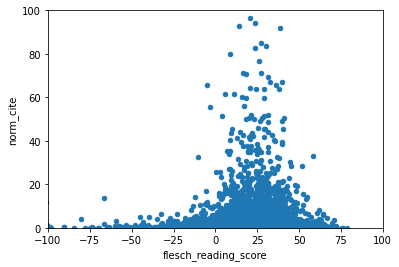

In [178]:
df_clean.plot.scatter(x='flesch_reading_score', y='norm_cite', xlim=(-100, 100), ylim=(0,100))

<AxesSubplot:xlabel='total_paragraphs', ylabel='norm_cite'>

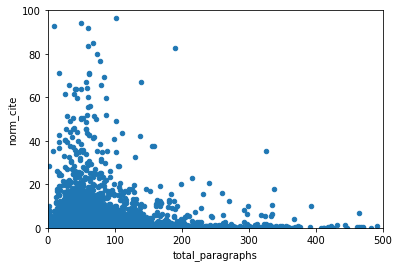

In [179]:
df_clean.plot.scatter(x='total_paragraphs', y='norm_cite', xlim=(0, 500), ylim=(0,100))

<AxesSubplot:xlabel='avg_sentences_per_para', ylabel='norm_cite'>

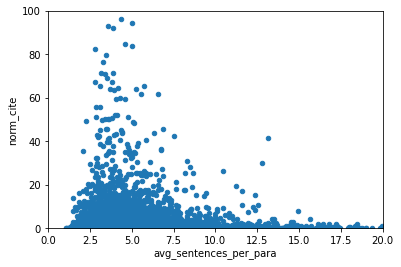

In [180]:
df_clean.plot.scatter(x='avg_sentences_per_para', y='norm_cite', xlim=(0,20), ylim=(0,100))

<AxesSubplot:xlabel='len_of_longest_paragraph', ylabel='norm_cite'>

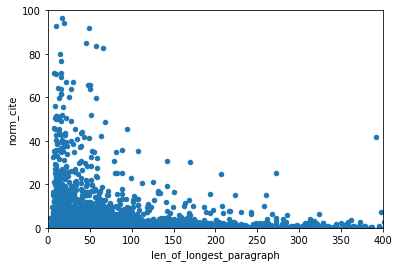

In [181]:
df_clean.plot.scatter(x='len_of_longest_paragraph', y='norm_cite', xlim=(0, 400), ylim=(0,100))

<AxesSubplot:xlabel='total_sentences', ylabel='norm_cite'>

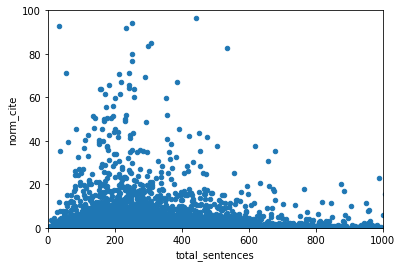

In [182]:
df_clean.plot.scatter(x='total_sentences', y='norm_cite', xlim=(0, 1000), ylim=(0,100))

<AxesSubplot:xlabel='avg_words_per_sentence', ylabel='norm_cite'>

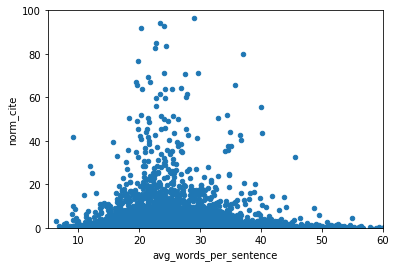

In [183]:
df_clean.plot.scatter(x='avg_words_per_sentence', y='norm_cite', xlim=(5, 60), ylim=(0,100))

<AxesSubplot:xlabel='len_of_longest_sentence', ylabel='norm_cite'>

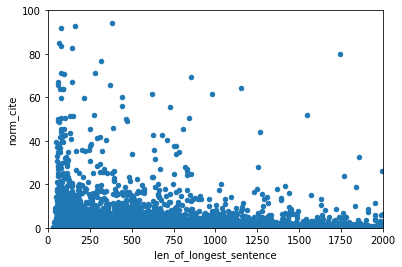

In [184]:
df_clean.plot.scatter(x='len_of_longest_sentence', y='norm_cite', xlim=(0, 2000), ylim=(0,100))

<AxesSubplot:xlabel='total_words', ylabel='norm_cite'>

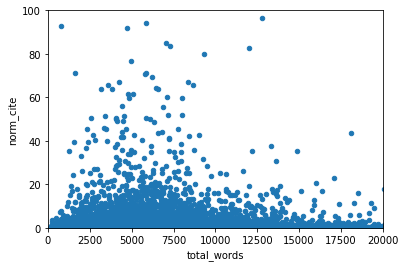

In [185]:
df_clean.plot.scatter(x='total_words', y='norm_cite', xlim=(0, 20000), ylim=(0,100))

<AxesSubplot:xlabel='compulsive_hedgers', ylabel='norm_cite'>

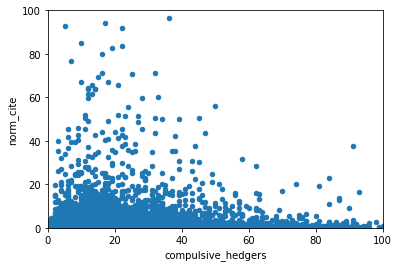

In [186]:
df_clean.plot.scatter(x='compulsive_hedgers', y='norm_cite', xlim=(0, 100), ylim=(0,100))

<AxesSubplot:xlabel='intensifiers', ylabel='norm_cite'>

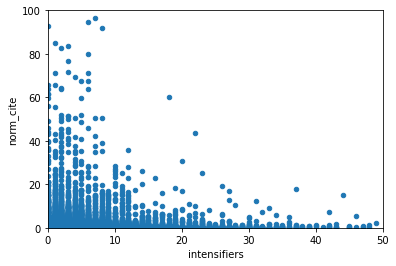

In [187]:
df_clean.plot.scatter(x='intensifiers', y='norm_cite', xlim=(0, 50), ylim=(0,100))

<AxesSubplot:xlabel='and_frequency', ylabel='norm_cite'>

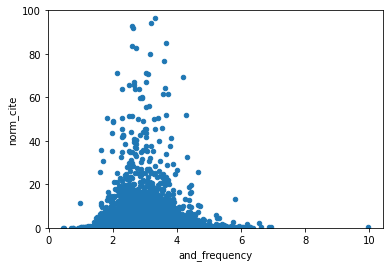

In [188]:
df_clean.plot.scatter(x='and_frequency', y='norm_cite', ylim=(0,100))

<AxesSubplot:xlabel='vague_words_frequency', ylabel='norm_cite'>

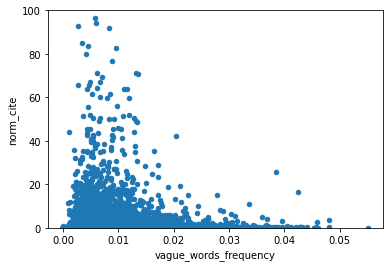

In [189]:
df_clean.plot.scatter(x='vague_words_frequency', y='norm_cite', ylim=(0,100))

<AxesSubplot:xlabel='polysyllab_frequency', ylabel='norm_cite'>

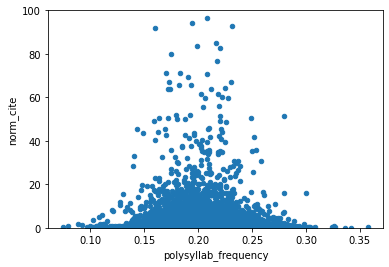

In [190]:
df_clean.plot.scatter(x='polysyllab_frequency', y='norm_cite', ylim=(0,100))

<AxesSubplot:xlabel='flesch_reading_score', ylabel='score'>

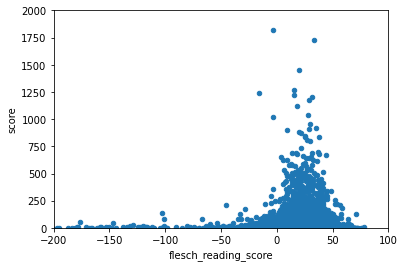

In [191]:
df_clean.plot.scatter(x='flesch_reading_score', y='score', xlim=(-200,100), ylim=(0,2000))

<AxesSubplot:xlabel='dale_chall_readability_score', ylabel='score'>

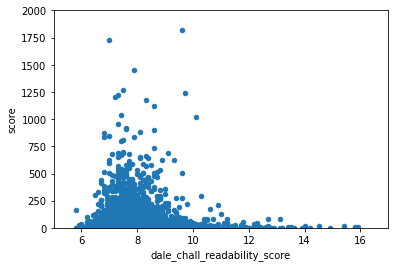

In [192]:
df_clean.plot.scatter(x='dale_chall_readability_score', y='score', xlim=(5, 17), ylim=(0,2000))

In [193]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
trans = RobustScaler()
data = trans.fit_transform(df_clean)
norm = Normalizer()
data = norm.fit_transform(data)
dataset = pd.DataFrame(data, columns=columns)

In [194]:
print(dataset.describe())

       reading_time  flesch_reading_score  dale_chall_readability_score  \
count  40276.000000          40276.000000                  40276.000000   
mean      -0.007913             -0.016363                      0.017285   
std        0.180572              0.205990                      0.208139   
min       -0.419418             -0.996030                     -0.666990   
25%       -0.139212             -0.134052                     -0.128147   
50%        0.000000              0.000000                      0.000000   
75%        0.122471              0.110717                      0.146102   
max        0.489360              0.693919                      0.729104   

       total_paragraphs  avg_sentences_per_para  len_of_longest_paragraph  \
count      40276.000000            40276.000000              40276.000000   
mean           0.029402                0.032156                  0.094132   
std            0.201009                0.223658                  0.216976   
min           -0

In [195]:
dataset.corr(method='spearman')

,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,avg_words_per_sentence,len_of_longest_sentence,total_words,...,vague_words_count,vague_words_frequency,polysyllab_count,polysyllab_frequency,readers_count,score,cited_by_accounts_count,average_read_count,average_cite_count,norm_cite
reading_time,1.000000,0.064917,-0.516264,0.679346,0.246369,0.406242,0.895771,0.022221,0.165021,1.000000,...,0.599109,-0.041349,0.956083,-0.019601,0.345554,0.075663,0.108172,0.346147,0.108677,0.113508
flesch_reading_score,0.064917,1.000000,-0.644075,0.104945,0.257066,0.350333,0.294085,-0.569303,-0.359069,0.064917,...,-0.073258,-0.143621,-0.060974,-0.457511,-0.017024,0.012298,-0.023357,-0.010179,-0.015686,-0.023395
dale_chall_readability_score,-0.516264,-0.644075,1.000000,-0.438581,-0.338021,-0.518391,-0.706527,0.515645,0.276436,-0.516264,...,-0.247824,0.123559,-0.459986,0.161096,-0.161976,-0.021129,0.019581,-0.165770,0.011701,0.014639
total_paragraphs,0.679346,0.104945,-0.438581,1.000000,-0.362835,0.214989,0.737803,-0.239984,-0.000429,0.679346,...,0.477029,0.029936,0.642146,-0.061447,0.302788,0.061202,0.063135,0.307573,0.071249,0.074570
avg_sentences_per_para,0.246369,0.257066,-0.338021,-0.362835,1.000000,0.504154,0.287674,-0.151636,-0.082819,0.246369,...,0.048406,-0.123289,0.250624,0.046249,0.028407,0.031489,0.052720,0.031412,0.053590,0.053520
len_of_longest_paragraph,0.406242,0.350333,-0.518391,0.214989,0.504154,1.000000,0.579585,-0.468248,-0.470092,0.406242,...,0.191068,-0.100088,0.401042,0.017122,0.196976,0.092539,0.118280,0.217423,0.137865,0.133312
total_sentences,0.895771,0.294085,-0.706527,0.737803,0.287674,0.579585,1.000000,-0.376770,-0.082603,0.895771,...,0.517516,-0.069537,0.858079,-0.025833,0.318592,0.081632,0.105459,0.325517,0.112942,0.114656
avg_words_per_sentence,0.022221,-0.569303,0.515645,-0.239984,-0.151636,-0.468248,-0.376770,1.000000,0.559675,0.022221,...,0.078778,0.072433,0.024608,0.012511,0.023993,-0.010359,-0.010687,0.007407,-0.027459,-0.022238
len_of_longest_sentence,0.165021,-0.359069,0.276436,-0.000429,-0.082819,-0.470092,-0.082603,0.559675,1.000000,0.165021,...,0.083050,-0.053657,0.159497,-0.007411,0.006946,-0.026827,-0.030078,-0.014649,-0.049793,-0.042866
total_words,1.000000,0.064917,-0.516264,0.679346,0.246369,0.406242,0.895771,0.022221,0.165021,1.000000,...,0.599109,-0.041349,0.956083,-0.019601,0.345554,0.075663,0.108172,0.346147,0.108677,0.113508
